# Import libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display all output in a cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('formatted_flights.csv')
df.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


In [7]:
df.groupby(['name']).mean()

,arr_delay
name,
AirTran Airways Corporation,10.543860
Alaska Airlines Inc.,-11.878084
American Airlines Inc.,-3.985960
Delta Air Lines Inc.,-3.246191
Endeavor Air Inc.,-0.261913
Envoy Air,5.816171
ExpressJet Airlines Inc.,7.548858
Frontier Airlines Inc.,9.932707
Hawaiian Airlines Inc.,-11.608434


# Data Visualization

## Histogram

(array([  276.,   636.,  1394.,  2820.,  5339.,  9420., 15551., 23546.,
        31319., 34857., 33790., 29786., 24391., 19028., 14894., 11324.,
         8815.,  7159.,  5908.,  4896.,  4130.,  3630.,  3139.,  2782.,
         2455.,  2179.,  1973.,  1805.,  1646.,  1454.,  1360.,  1286.,
         1167.,  1013.,   945.,  1000.]),
 array([-60., -55., -50., -45., -40., -35., -30., -25., -20., -15., -10.,
         -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
         50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.,
        105., 110., 115., 120.]),
 <a list of 36 Patch objects>)

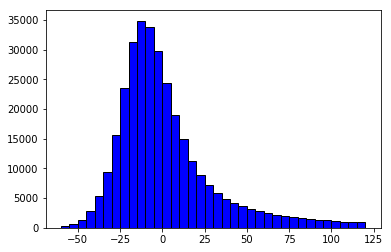

In [8]:
# Plot in matplotlib
plt.hist(df['arr_delay'], color='blue', edgecolor='black', 
         bins=int(180/5)) # range of the data (from -60 to 120 minutes) divided by the binwidth of 5 minutes

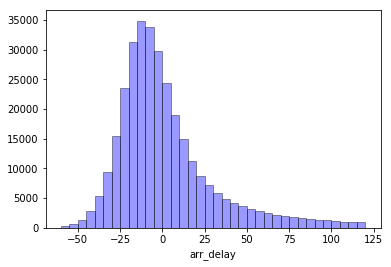

In [9]:
# Plot in seaborn
sns.distplot(df['arr_delay'], hist=True, 
             kde=False, 
             bins=int(180/5), # range of the data (from -60 to 120 minutes) divided by the binwidth of 5 minutes
             color='blue', hist_kws={'edgecolor': 'black'})

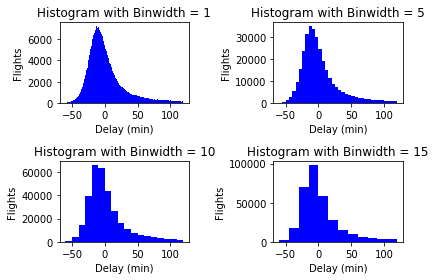

In [14]:
# Visualize in 4 different binwidth
for i, binwidth in enumerate([1, 5, 10, 15]):
    # Setup the plot
    ax = plt.subplot(2, 2, i+1)
    
    # Draw the plot
    ax.hist(df['arr_delay'], color='blue',
            bins= int(180/binwidth))
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Delay (min)')
    ax.set_ylabel('Flights')
    
plt.tight_layout()
plt.show()

(array([  3790.,  35699., 112912.,  86119.,  35825.,  17159.,  10221.,
          6861.,   4893.,   3634.]),
 array([-60., -42., -24.,  -6.,  12.,  30.,  48.,  66.,  84., 102., 120.]),
 <a list of 10 Patch objects>)

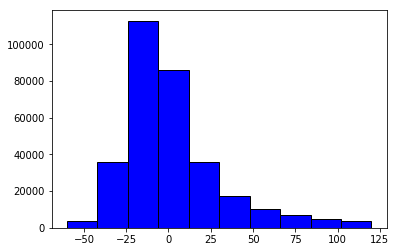

In [16]:
# Matplotlib choose binwidth automatically
plt.hist(df['arr_delay'], color='blue', edgecolor='black')

In [17]:
flights = df.copy()

C:\Users\Frank\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

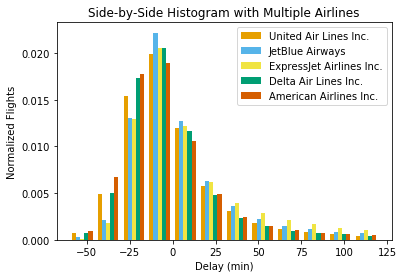

In [22]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

In [53]:
delay = df.groupby(['name']).mean().sort_values(by=['arr_delay']).reset_index()
delay

,name,arr_delay
0,Alaska Airlines Inc.,-11.878084
1,Hawaiian Airlines Inc.,-11.608434
2,Virgin America,-5.178252
3,American Airlines Inc.,-3.985960
4,Delta Air Lines Inc.,-3.246191
5,United Air Lines Inc.,-0.805461
6,US Airways Inc.,-0.471070
7,Endeavor Air Inc.,-0.261913
8,SkyWest Airlines Inc.,1.814815
9,Southwest Airlines Co.,2.522351


([<matplotlib.axis.YTick at 0x26dd7b7b240>,
 <a list of 16 Text yticklabel objects>)

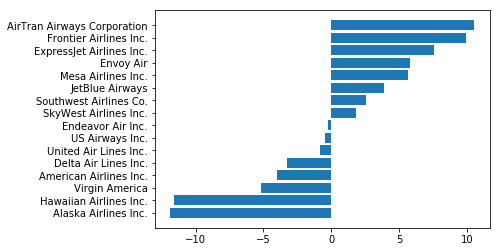

In [57]:
plt.barh(np.arange(delay.name.nunique()), delay['arr_delay'])
plt.yticks(np.arange(0,16), delay['name'])